In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LG

In [3]:
db=np.load("proyecto_training_data.npy")
df=pd.DataFrame(db)
df

,0,1,2,3,4,5
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [4]:
df.columns=["SalePrice","OverallQual","1stFlrSF","TotRmsAbvGrd","YearBuilt","LotFrontage"]
df

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [5]:
stats=df.describe(include='all')
stats

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


In [6]:
R=stats.loc["max"]-stats.loc['min']
Rango=pd.DataFrame([R],index=['Rango'])
pd.concat([stats,Rango])

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000
Rango,720100.000000,9.000000,4358.000000,12.000000,138.000000,292.000000


In [7]:
r2=df.corr('pearson',numeric_only=True)
r2
    

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
SalePrice,1.000000,0.790982,0.605852,0.533723,0.522897,0.351799
OverallQual,0.790982,1.000000,0.476224,0.427452,0.572323,0.251646
1stFlrSF,0.605852,0.476224,1.000000,0.409516,0.281986,0.457181
TotRmsAbvGrd,0.533723,0.427452,0.409516,1.000000,0.095589,0.352096
YearBuilt,0.522897,0.572323,0.281986,0.095589,1.000000,0.123349
LotFrontage,0.351799,0.251646,0.457181,0.352096,0.123349,1.000000


Definimos como una buena correlación cuando r2>=0.6

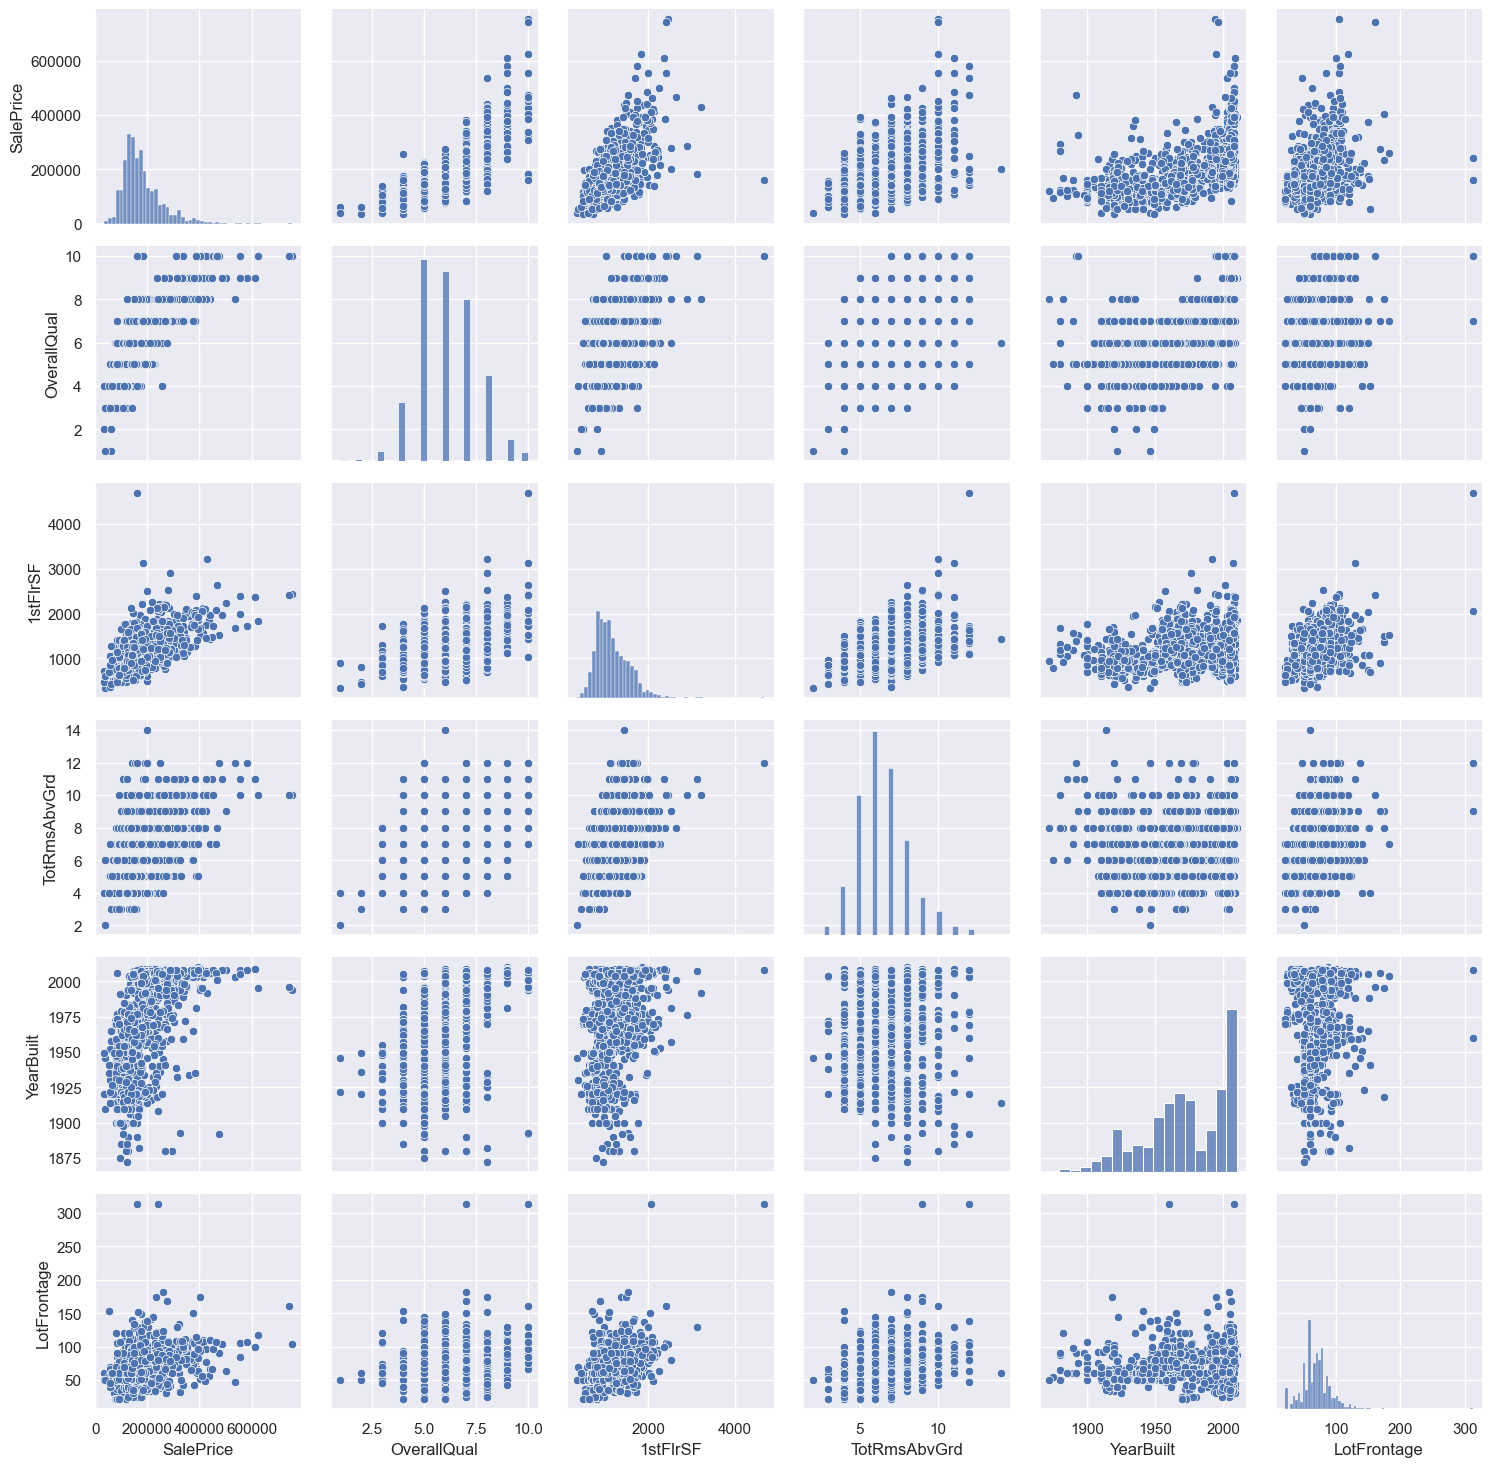

In [8]:
import seaborn as sns
sns.set_theme()
G=sns.PairGrid(df,dropna=True)
G.map_diag(sns.histplot)
G.map_offdiag(sns.scatterplot)


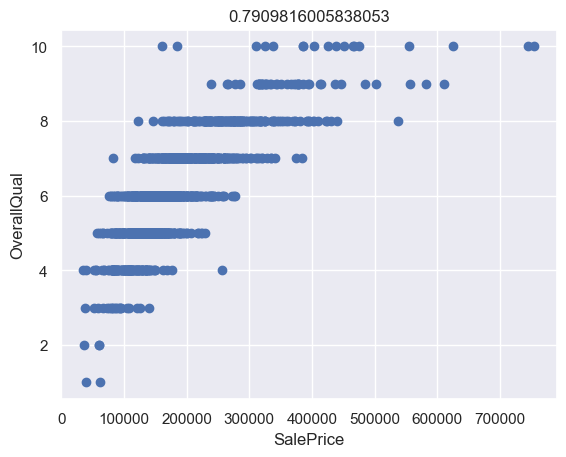

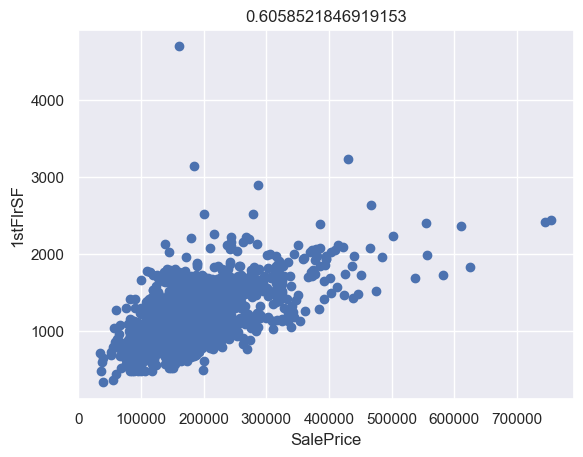

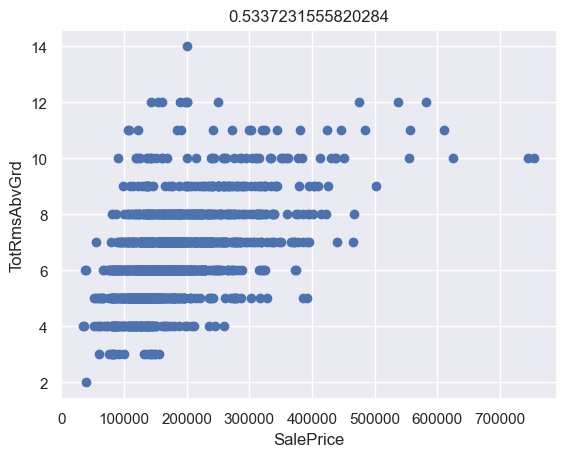

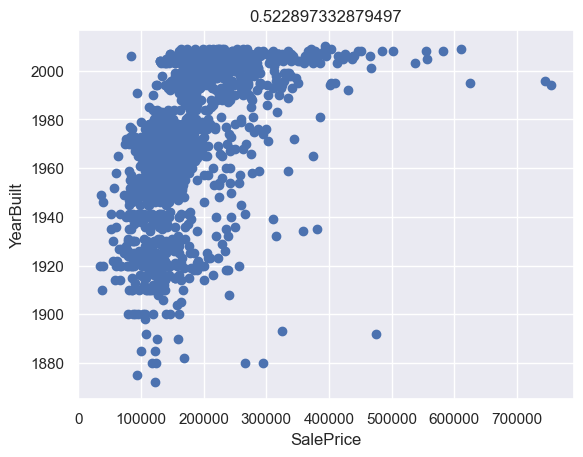

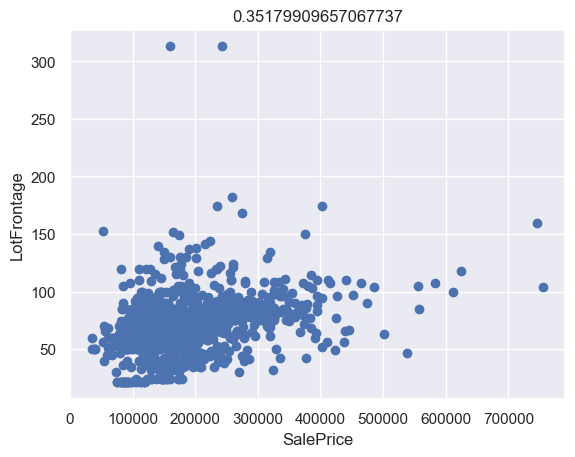

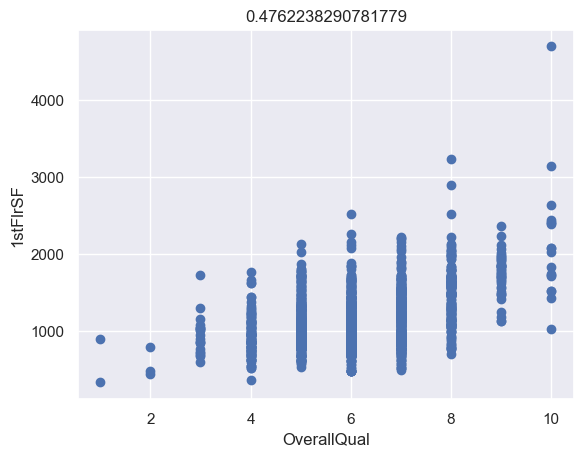

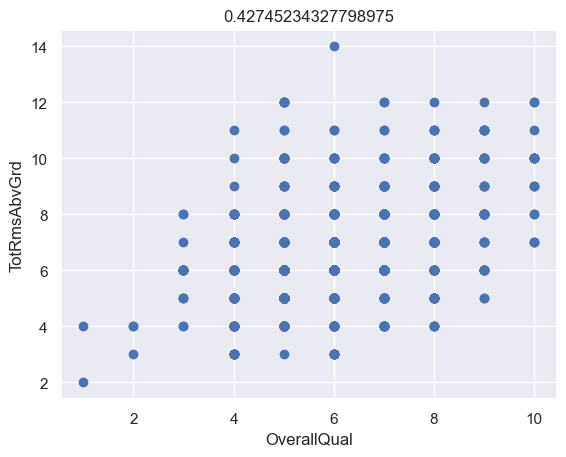

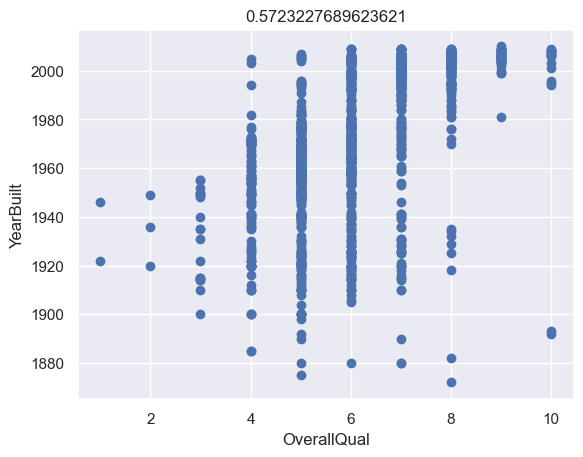

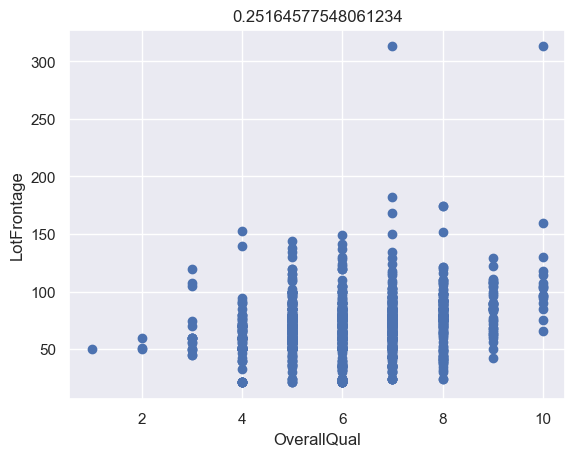

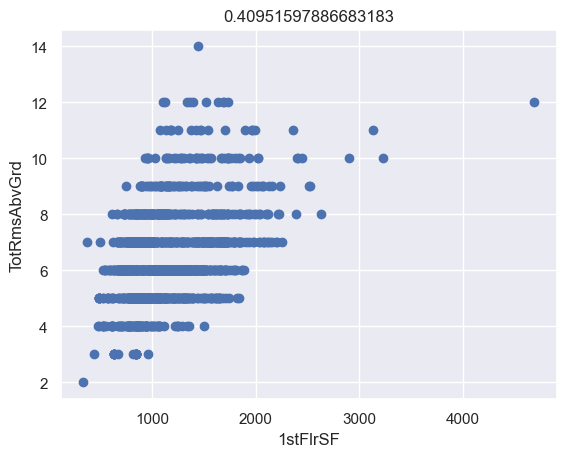

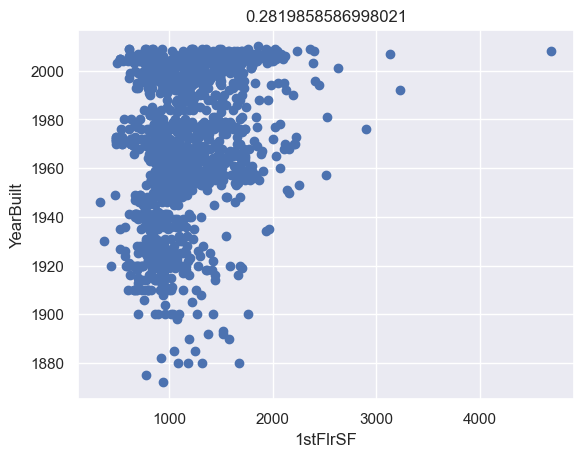

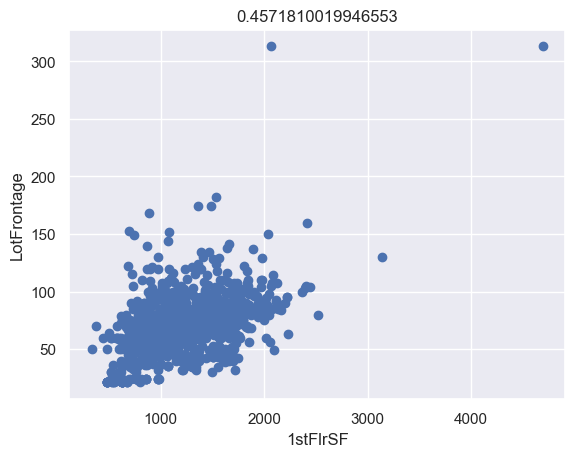

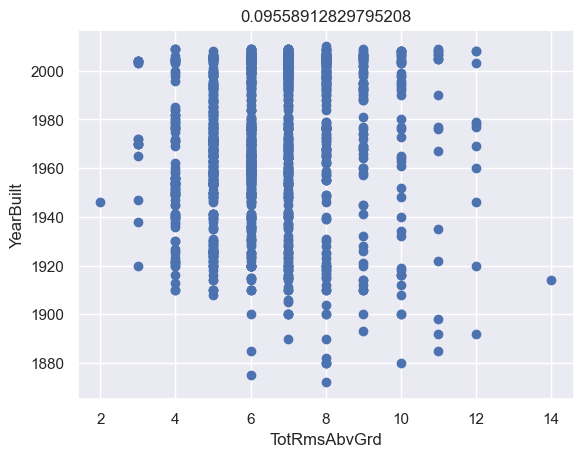

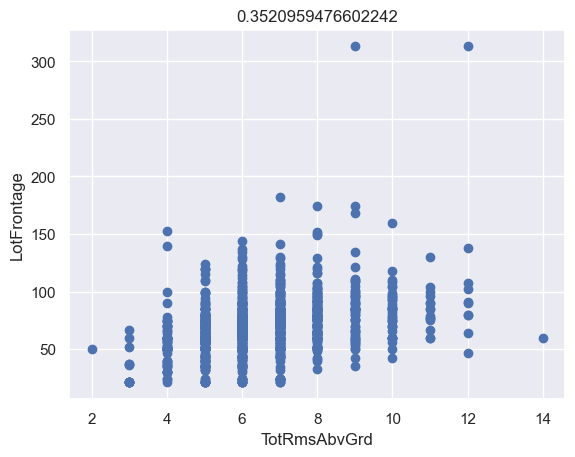

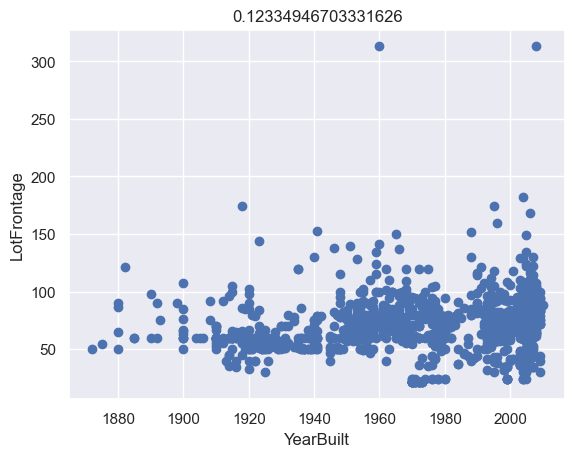

In [9]:
from itertools import combinations

variables=df.columns
Rels=pd.DataFrame(combinations(variables,2))
rtitle=[]
figures = [plt.figure() for _ in range(15)]
for i, fig in enumerate(figures):
    x1=Rels.iloc[i].iloc[0]
    x2=Rels.iloc[i].iloc[1]
    ax = fig.add_subplot(111)
    ax.scatter(df[x1],df[x2])
    ax.set_title(r2[x1][x2])
    ax.set_xlabel(x1)
    ax.set_ylabel(x2)


In [10]:
ma=stats['SalePrice']['mean']
mb=stats['OverallQual']['mean']
mc=stats['1stFlrSF']['mean']
m0=mc/ma
m0



0.006426149830631248

In [12]:
class Modelo_lineal():
        
    Ei=np.array([])
    x=[]
    y=[]
    Model={}
    Ym=[]
    MB0=0
    MB1=m0

    @staticmethod
    def Randomdata():
        global TD
        global VD
        TD=df.sample(frac=0.8)
        id=TD.index
        VD=df
        VD=VD.drop(id)
        print("Variables TD y VD creadas")
    
    @classmethod
    def Training(cls,x,y,epochs,err_int,alpha):
    
        #toma los vectores introducidos y se asegura que sean np.array
        cls.x=np.array(x)
        cls.y=np.array(y)
        print(cls.x)
        #Almacena variables de utilidad
        n=x.size
        a=alpha
        It=epochs
        #crea una matriz x,ones vertical y horizontal
        xv=cls.x.reshape(-1,1)
        v1=np.ones_like(xv)
        Vx=np.hstack([xv,v1])
        Hx=np.transpose(Vx)
        #Define los parámetros iniciales B1 y B0 y crea la matrix B
        B0=0
        B1=m0
        VB=np.array([B1,B0])
        #crea matriz para almacenar errores y matriz de iteración de B 
        cls.Ei=np.array([])
        Bi=VB
        cls.Model={}
        
        for i in range(It+1):
            Vy=np.matmul(Vx,Bi)
            cls.Ym=Vy
            Dy=(y-Vy)
            e=(1/(2*n))*np.sum(Dy**2)
            eB=np.matmul(Hx,-Dy)
            Mi=np.append(Bi,e)
            cls.Ei=np.append(cls.Ei,e)
            cls.Model[i]=Mi
            Bi=Bi-(a*eB)
            cls.MB0=Bi[1]
            cls.MB1=Bi[0]
        EP=np.arange(0,It,err_int)
        print(f'Convergencia del error: {cls.Ei[EP]}')
    
    @classmethod
    def Error_Plot(cls):
        plt.plot(cls.Ei)
        plt.xlabel('Iteraciones')
        plt.ylabel('Error')

    @classmethod
    def Plot_Modelo(cls,step):
        n=len(cls.Model)
        I=np.arange(step,n,step)
        mn=np.min(Modelo_lineal.x)
        mx=np.max(Modelo_lineal.x)
        xi=np.linspace(mn,mx,10,endpoint=True)
        figures = [plt.figure() for _ in range(I.size)]
        for i, fig in enumerate(figures):
            ax = fig.add_subplot(111)
            yi=xi*cls.Model[I[i]][0]+cls.Model[I[i]][1]
            lbl='y='+str(cls.Model[I[i]][0])+'x+'+str(cls.Model[I[i]][1])
            ax.scatter(cls.x,cls.y)
            ax.plot(xi,yi,label=lbl)
            ax.legend()
            ax.set_title(f'Iteración {I[i]}')
            
    @classmethod
    def Reg(cls,x):
        global Pred
        xt=cls.x.reshape(-1,1)
        yt=cls.y.reshape(-1,1)
        x=np.array(x).reshape(-1,1)
        Reg=LG()
        Reg.fit(xt,yt)
        Ys=Reg.predict(x)
        Ym=x*cls.MB1+cls.MB0
        Yp=(Ys+Ym)/2
        P={'Scikit':Ys[:,0],'Modelo Py':Ym[:,0],'Promedio':Yp[:,0]}
        Pred=pd.DataFrame(P)
        print('Se ha generado la Variable Pred:')
        print(Pred)    
        
        
            
                
  
    

In [13]:
Modelo_lineal.Randomdata()

Variables TD y VD creadas


In [14]:
TD

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
342,87500.0,3.0,1040.0,6.0,1949.0,NaN
1115,318000.0,8.0,1734.0,7.0,2007.0,93.0
888,268000.0,8.0,2217.0,8.0,1970.0,95.0
1273,177000.0,6.0,1357.0,5.0,1959.0,124.0
587,137000.0,5.0,860.0,4.0,1982.0,74.0
...,...,...,...,...,...,...
877,350000.0,9.0,1462.0,10.0,2004.0,74.0
963,239000.0,9.0,1800.0,7.0,2007.0,122.0
1340,123000.0,4.0,872.0,5.0,1971.0,70.0
638,85000.0,5.0,796.0,4.0,1910.0,67.0


In [15]:
VD

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
5,143000.0,5.0,796.0,5.0,1993.0,85.0
6,307000.0,8.0,1694.0,7.0,2004.0,75.0
11,345000.0,9.0,1182.0,11.0,2005.0,85.0
13,279500.0,7.0,1494.0,7.0,2006.0,91.0
...,...,...,...,...,...,...
1445,129000.0,6.0,913.0,6.0,1966.0,70.0
1448,112000.0,4.0,796.0,6.0,1910.0,70.0
1451,287090.0,8.0,1578.0,7.0,2008.0,78.0
1452,145000.0,5.0,1072.0,5.0,2005.0,35.0


In [16]:
Modelo_lineal.Training(TD['SalePrice'],TD['1stFlrSF'],200,10,0.000000000000001)

[ 87500. 318000. 268000. ... 123000.  85000. 181000.]
Convergencia del error: [88776.95430474 85365.41716833 84033.99164358 83514.37428131
 83311.58246291 83232.43860703 83201.55102003 83189.49647677
 83184.79193269 83182.95588341 83182.23932573 83181.95967365
 83181.85053336 83181.80793895 83181.79131549 83181.78482775
 83181.7822957  83181.78130744 83181.78092167 83181.78077105]


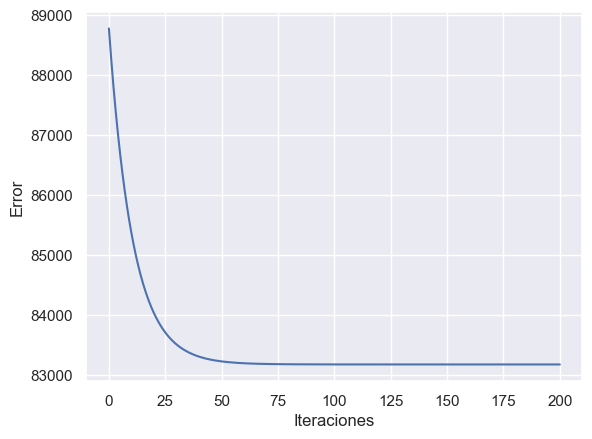

In [17]:
Modelo_lineal.Error_Plot()

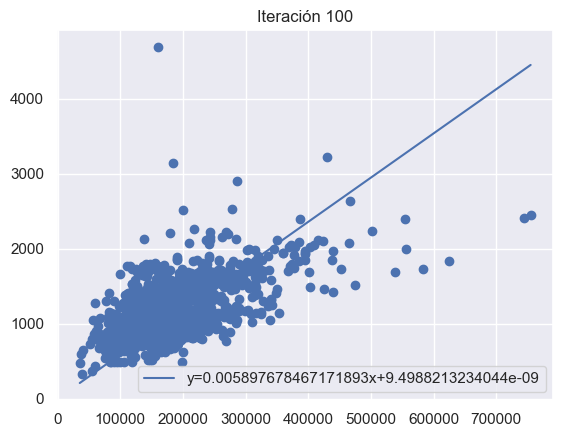

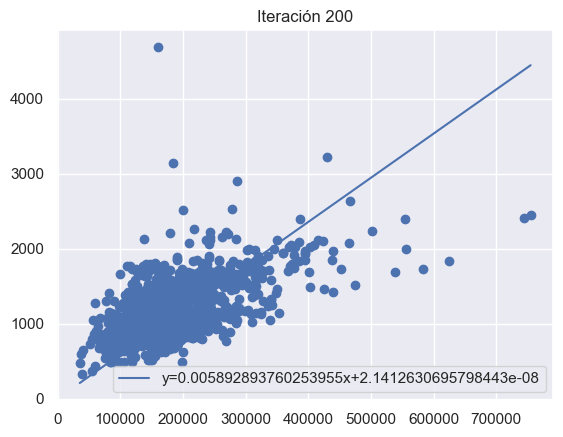

In [18]:
Modelo_lineal.Plot_Modelo(100)

In [19]:
Modelo_lineal.Reg(VD['SalePrice'])


Se ha generado la Variable Pred:
          Scikit    Modelo Py     Promedio
0    1252.756713  1228.667930  1240.712322
1    1055.835998   842.683520   949.259759
2    1548.889393  1809.117768  1679.003580
3    1663.133472  2033.047654  1848.090563
4    1466.212756  1647.063244  1556.638000
..           ...          ...          ...
287  1013.746074   760.183036   886.964555
288   962.636880   660.003876   811.320378
289  1489.031508  1691.790293  1590.410900
290  1061.848844   854.469304   958.159074
291  1182.105770  1090.184974  1136.145372

[292 rows x 3 columns]


<BarContainer object of 3 artists>

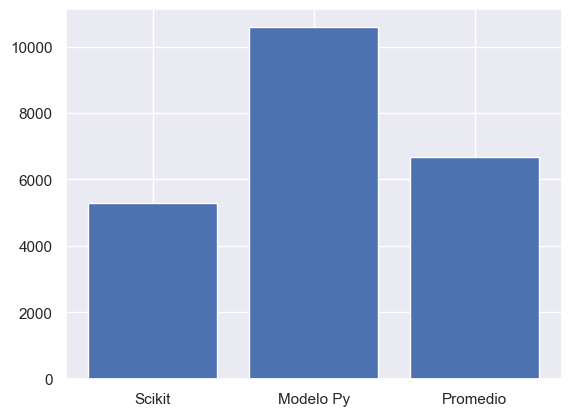

In [20]:
VD.reset_index(drop=True,inplace=True)
n=VD.size
Pred['Y']=VD['1stFlrSF']
DS=Pred['Scikit']-Pred['Y']
DM=Pred['Modelo Py']-Pred['Y']
DP=Pred['Promedio']-Pred['Y']
ES=(1/(2*n))*np.sum(DS**2)
EM=(1/(2*n))*np.sum(DM**2)
EP=(1/(2*n))*np.sum(DP**2)
Lbl=['Scikit','Modelo Py','Promedio']
plt.bar(Lbl,[ES,EM,EP])


Para esta muestra de datos el modelo de scikit es el más adecuado.
Sin embargo dada la magnitud de la variable dependiente todos los modelos se ajustan correctamente.

In [21]:
Modelo_lineal.Training(TD['SalePrice'],TD['OverallQual'],200,10,0.000000000000001)

[ 87500. 318000. 268000. ... 123000.  85000. 181000.]
Convergencia del error: [8.04729899e+05 3.14063969e+05 1.22571068e+05 4.78368566e+04
 1.86702281e+04 7.28732588e+03 2.84490419e+03 1.11115386e+03
 4.34520621e+02 1.70449988e+02 6.73907608e+01 2.71696873e+01
 1.14725509e+01 5.34640682e+00 2.95554772e+00 2.02246368e+00
 1.65830763e+00 1.51618792e+00 1.46072266e+00 1.43907615e+00]


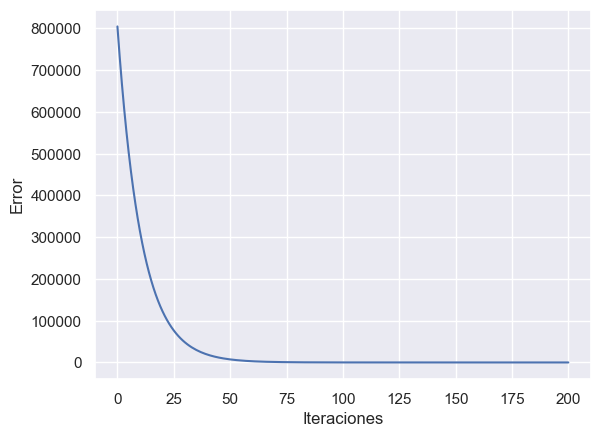

In [22]:
Modelo_lineal.Error_Plot()

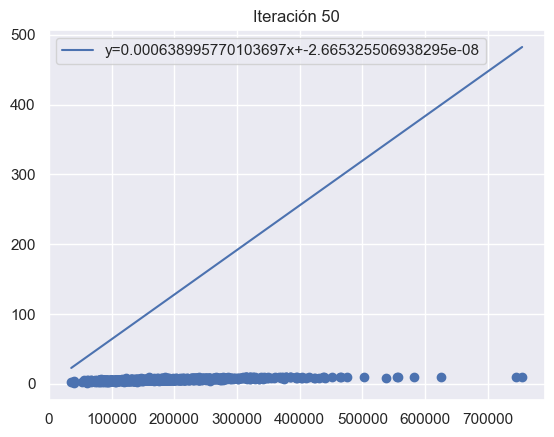

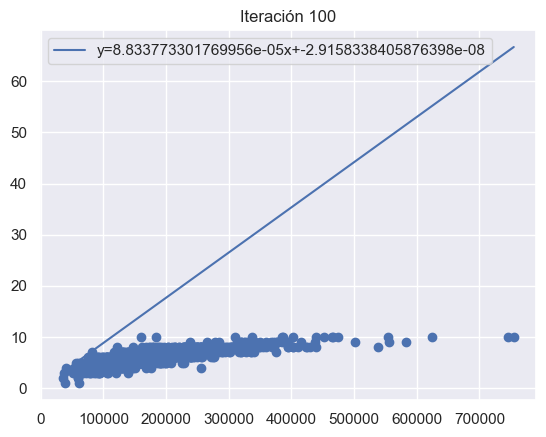

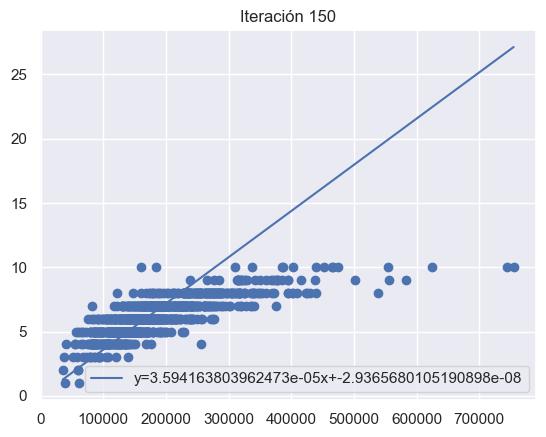

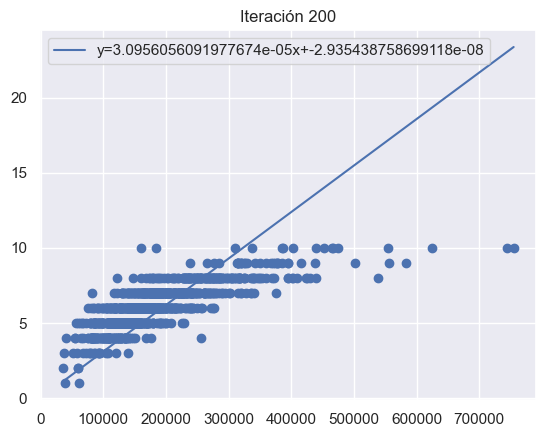

In [23]:
Modelo_lineal.Plot_Modelo(50)

In [24]:
Modelo_lineal.Reg(VD['SalePrice'])

Se ha generado la Variable Pred:
       Scikit  Modelo Py  Promedio
0    6.483458   6.449314  6.466386
1    5.576262   4.423271  4.999766
2    7.847715   9.496112  8.671914
3    8.374027  10.671527  9.522777
4    7.466831   8.645484  8.056157
..        ...        ...       ...
287  5.382357   3.990223  4.686290
288  5.146902   3.464380  4.305641
289  7.571955   8.880257  8.226106
290  5.603962   4.485135  5.044548
291  6.157975   5.722413  5.940194

[292 rows x 3 columns]


<BarContainer object of 3 artists>

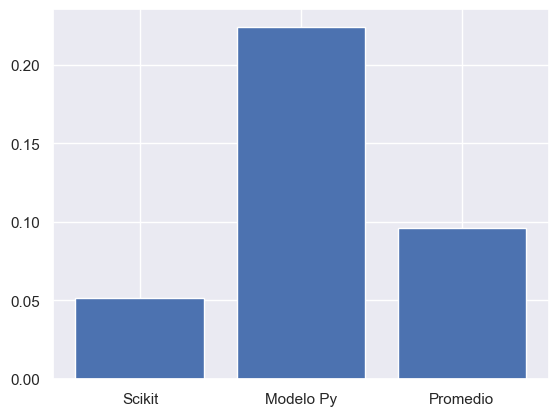

In [25]:
VD.reset_index(drop=True,inplace=True)
n=VD.size
Pred['Y']=VD['OverallQual']
DS=Pred['Scikit']-Pred['Y']
DM=Pred['Modelo Py']-Pred['Y']
DP=Pred['Promedio']-Pred['Y']
ES=(1/(2*n))*np.sum(DS**2)
EM=(1/(2*n))*np.sum(DM**2)
EP=(1/(2*n))*np.sum(DP**2)
Lbl=['Scikit','Modelo Py','Promedio']
plt.bar(Lbl,[ES,EM,EP])

El modelo de Scikit es el que más se ajusta pero debido al orde de magnitud de la variable dependiente todos los modelos se ajustan correctamente.
